In [159]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('C:/Users/aisak/Desktop/NetFlix.csv')

from collections import Counter
genre_counts = Counter()
df['genres'].dropna().str.split(', ').apply(genre_counts.update)
most_common_genres = genre_counts.most_common()

print(most_common_genres)

df_cleaned_rows = df.dropna()
df_cleaned_rows = df.dropna(axis=0)

cancelled_columns = ['director', 'rating', 'duration', 'date_added','show_id', 'type', 'title', 'cast', 'country', 'description']

cleaned_df = df_cleaned_rows.drop(cancelled_columns, axis=1)

def genre_prediction(genre):
    
    genre_df = cleaned_df[cleaned_df['genres'].str.contains(genre)]

    grouped_genre = genre_df.groupby('release_year').count()
    indexes_to_drop = grouped_genre[grouped_genre.index == 2021].index
    grouped_genre = grouped_genre.drop(indexes_to_drop)
    
    indexes_to_drop = grouped_genre[grouped_genre.index == 2020].index
    grouped_genre = grouped_genre.drop(indexes_to_drop)
    
    grouped_genre['release_year'] = pd.to_datetime(grouped_genre.index, format='%Y')
    grouped_genre.set_index('release_year', inplace=True)
    grouped_genre = grouped_genre.asfreq('AS')

    grouped_genre_filled = grouped_genre.fillna(method='bfill').fillna(method='ffill')

    model = auto_arima(grouped_genre_filled, seasonal=False, stepwise=True, trace=True)

    forecast = model.predict(n_periods=5)
    forecast_years = pd.date_range(start=grouped_genre_filled.index[-1] + pd.DateOffset(years=1), periods=5, freq='Y')

    plt.figure(figsize=(10, 5))
    plt.plot(grouped_genre_filled.index, grouped_genre_filled, label='Observed')
    plt.plot(forecast_years, forecast, label='Forecast', color='red')
    plt.legend()
    plt.show()

#grouped_comedies.plot()


#result = seasonal_decompose(grouped_comedies, model='additive', period=1)
#result.plot()
#plt.show()

def checking_correlation(genre):
    genre_df = cleaned_df[cleaned_df['genres'].str.contains(genre)]

    grouped_genre = genre_df.groupby('release_year').count()


    indexes_to_drop = grouped_genre[grouped_genre.index == 2021].index
    grouped_genre = grouped_genre.drop(indexes_to_drop)
    
    indexes_to_drop = grouped_genre[grouped_genre.index == 2020].index
    grouped_genre = grouped_genre.drop(indexes_to_drop)
    
    grouped_genre['release_year'] = pd.to_datetime(grouped_genre.index, format='%Y')
    grouped_genre.set_index('release_year', inplace=True)
    grouped_genre = grouped_genre.asfreq('AS')

    grouped_genre_filled = grouped_genre.fillna(method='bfill').fillna(method='ffill')

    lag_acf = acf(grouped_comedies_filled, nlags=20)
    lag_pacf = pacf(grouped_comedies_filled, nlags=20)

    plt.figure(figsize=(12, 6))
    plt.subplot(121) 
    plot_acf(lag_acf, ax=plt.gca())
    plt.subplot(122)
    plot_pacf(lag_pacf, ax=plt.gca())
    plt.show()
    
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

def checking_trends_etc(genre):
    
    genre_df = cleaned_df[cleaned_df['genres'].str.contains(genre)]

    grouped_genre = genre_df.groupby('release_year').count()


    indexes_to_drop = grouped_genre[grouped_genre.index == 2021].index
    grouped_genre = grouped_genre.drop(indexes_to_drop)
    indexes_to_drop = grouped_genre[grouped_genre.index == 2020].index
    grouped_genre = grouped_genre.drop(indexes_to_drop)
    
    grouped_genre['release_year'] = pd.to_datetime(grouped_genre.index, format='%Y')
    grouped_genre.set_index('release_year', inplace=True)
    grouped_genre = grouped_genre.asfreq('AS')

    grouped_genre_filled = grouped_genre.fillna(method='bfill').fillna(method='ffill')

    result = seasonal_decompose(grouped_genre_filled, model='additive', period=1)

    result.plot()
    plt.show()

[('International Movies', 2437), ('Dramas', 2106), ('Comedies', 1471), ('International TV Shows', 1199), ('Documentaries', 786), ('Action & Adventure', 721), ('TV Dramas', 704), ('Independent Movies', 673), ('Children & Family Movies', 532), ('Romantic Movies', 531), ('TV Comedies', 525), ('Thrillers', 491), ('Crime TV Shows', 427), ("Kids' TV", 414), ('Docuseries', 353), ('Romantic TV Shows', 333), ('Stand-Up Comedy', 329), ('Music & Musicals', 321), ('Horror Movies', 312), ('British TV Shows', 232), ('Reality TV', 222), ('Sci-Fi & Fantasy', 218), ('Sports Movies', 196), ('Korean TV Shows', 150), ('TV Action & Adventure', 150), ('Anime Series', 148), ('Spanish-Language TV Shows', 147), ('Classic Movies', 103), ('LGBTQ Movies', 90), ('TV Mysteries', 90), ('Science & Nature TV', 85), ('TV Sci-Fi & Fantasy', 76), ('TV Horror', 69), ('Teen TV Shows', 60), ('Cult Movies', 59), ('Faith & Spirituality', 57), ('Anime Features', 57), ('Movies', 56), ('Stand-Up Comedy & Talk Shows', 52), ('TV T

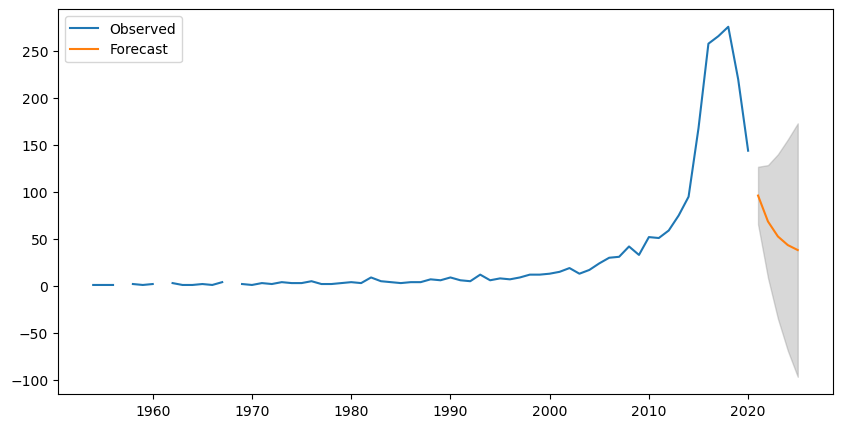

In [160]:
#probowalysmy zwykla ARIME
from statsmodels.tsa.arima.model import ARIMA


grouped_comedies['release_year'] = pd.to_datetime(grouped_comedies.index, format='%Y')
grouped_comedies.set_index('release_year', inplace=True)

grouped_comedies = grouped_comedies.asfreq('AS')

model = ARIMA(grouped_comedies['genres'], order=(1, 1, 1))
model_fit = model.fit()

forecast = model_fit.get_forecast(steps=5)
forecast_ci = forecast.conf_int()

plt.figure(figsize=(10, 5))
plt.plot(grouped_comedies.index, grouped_comedies['genres'], label='Observed')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='grey', alpha=0.3)
plt.legend()
plt.show()

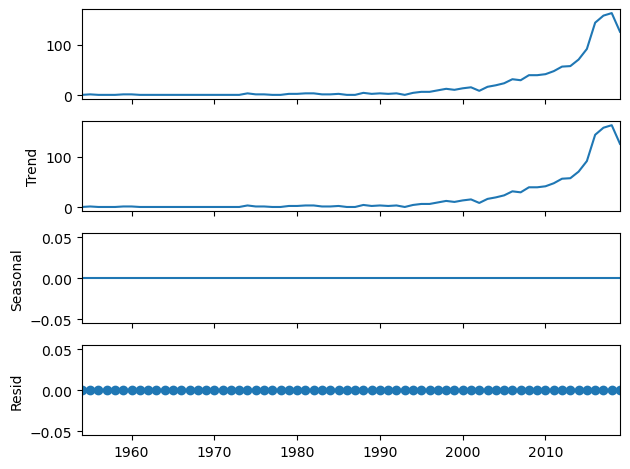

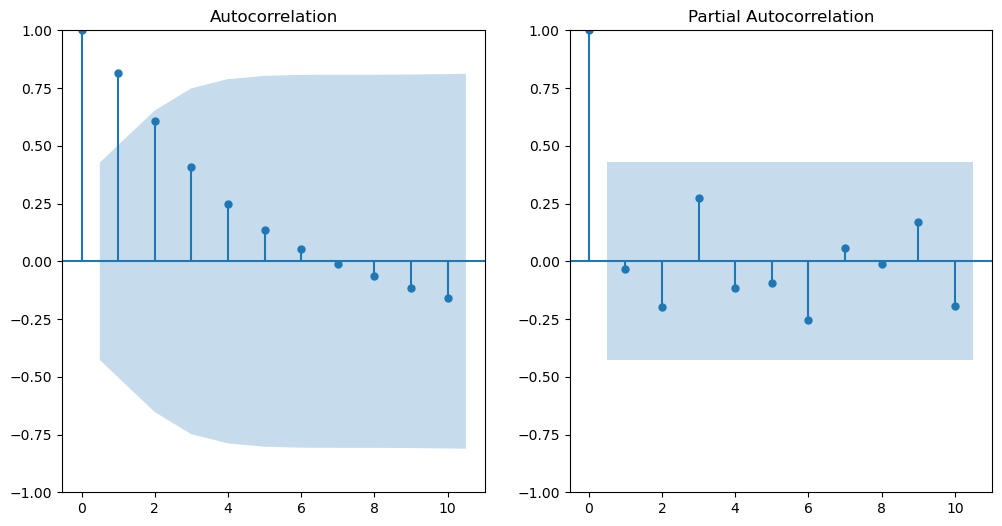

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=473.426, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=465.151, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=468.378, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=474.358, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=467.065, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=467.129, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=462.492, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=449.905, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=448.065, Time=0.09 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=449.835, Time=0.15 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=450.779, Time=0.33 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=448.484, Time=0.04 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0] intercept
Total fit time: 1.397 seconds


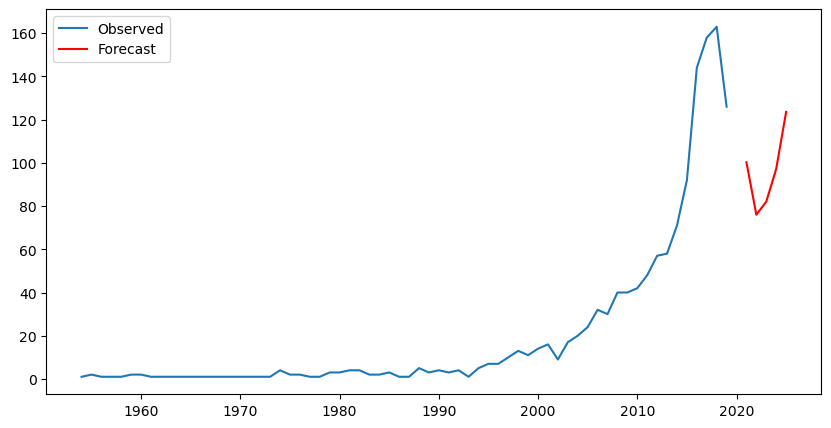

In [161]:
checking_trends_etc("Comedies")

checking_correlation("Comedies")

genre_prediction("Comedies")

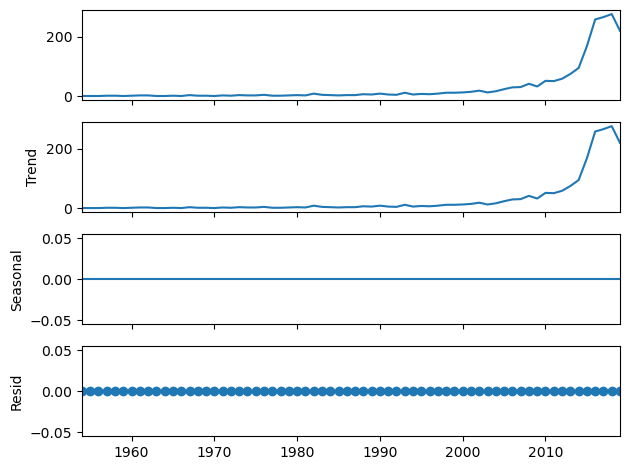

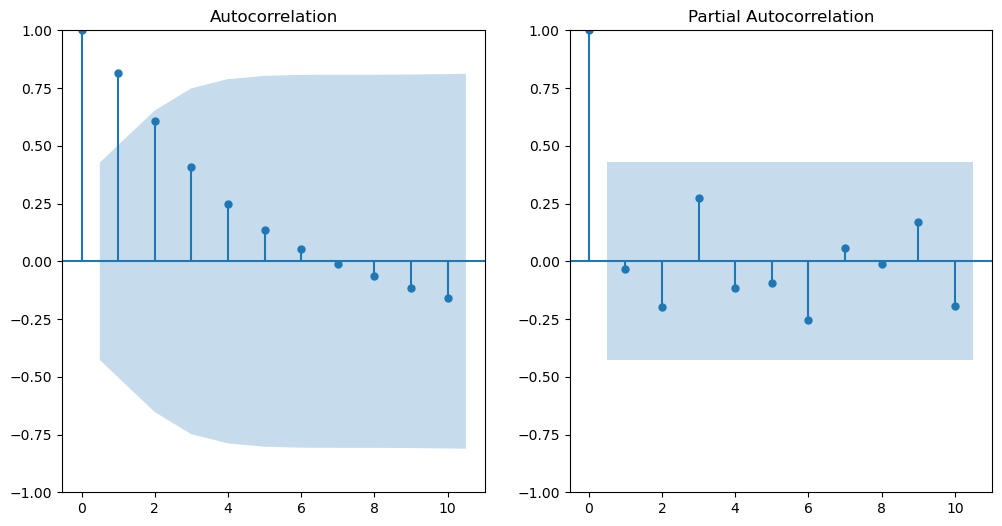

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=552.807, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=538.906, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=543.438, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=553.466, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=540.838, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=540.881, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=540.899, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=537.293, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=539.262, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=539.281, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=542.703, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=539.252, Time=0.29 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 2.189 seconds


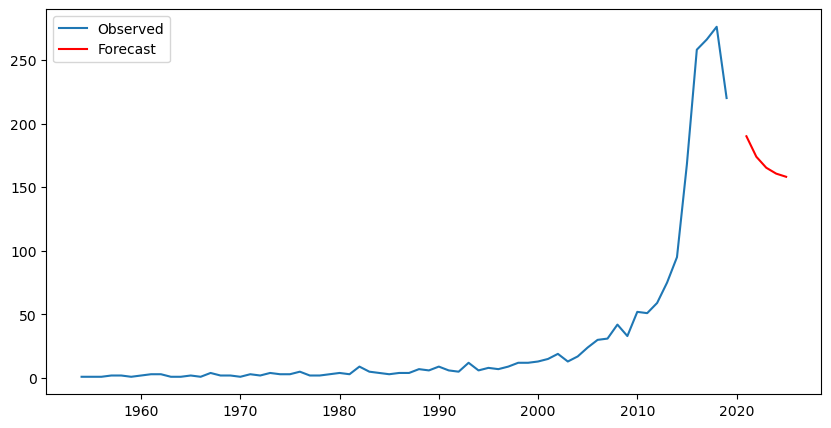

In [162]:
checking_trends_etc("Dramas")

checking_correlation("Dramas")

genre_prediction("Dramas")

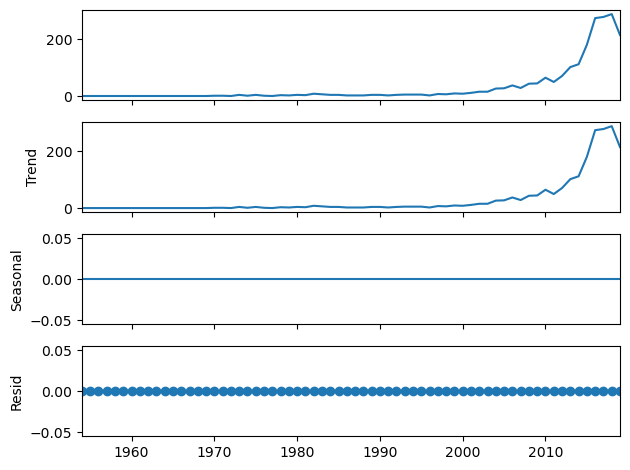

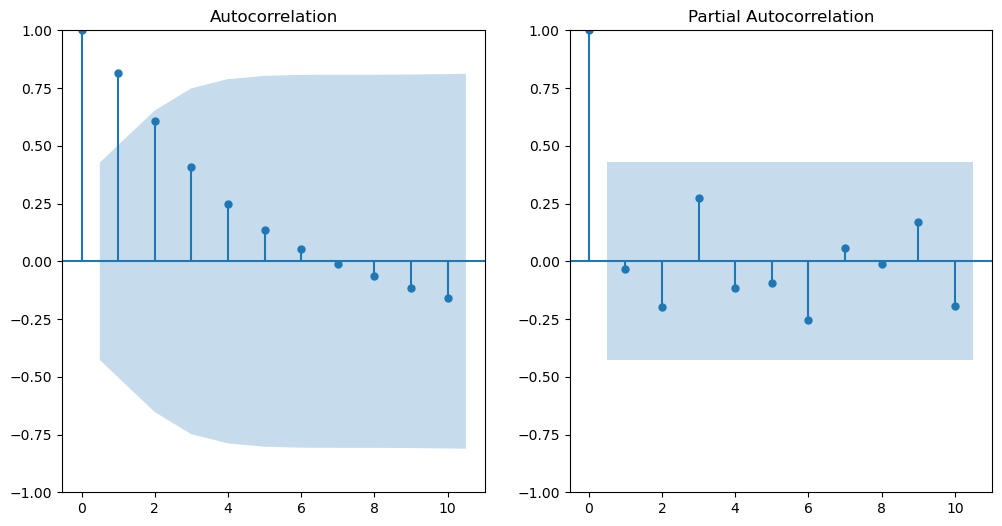

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=563.581, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=558.193, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=560.494, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=563.720, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=559.689, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=560.026, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=559.485, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=556.715, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=558.049, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=558.477, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=559.636, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=557.934, Time=0.19 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.945 seconds


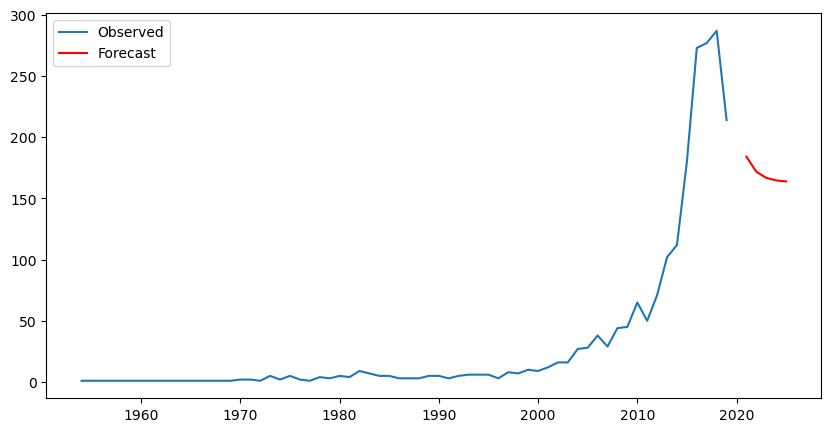

In [163]:
checking_trends_etc('International Movies')

checking_correlation('International Movies')

genre_prediction('International Movies')